In [0]:
!pip install import_ipynb
import os
import import_ipynb

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({'id':'13Tk_YigwTbRSNC8Wba8gr3EtduYXaOz5'})
your_module.GetContentFile('Vocabulary.ipynb')

your_module = drive.CreateFile({'id':'1Xkp7QG-bkM04BY0em4rRU6N7OZ_Ozcbk'})
your_module.GetContentFile('Dataset.ipynb')

your_module = drive.CreateFile({'id':'1aciM2iwbCMOdnKyxPtmby3cGN5gAWVj2'})
your_module.GetContentFile('Generator.ipynb')

your_module = drive.CreateFile({'id':'1IRjfwbTrCj9woVO4-bd79THIVoDArmwr'})
your_module.GetContentFile('Pix2Code.ipynb')


from Vocabulary import *
from Dataset import *
from Generator import *
from Pix2Code import *
import json

import numpy as np

In [0]:
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def startTraining(input_path, output_path):
    np.random.seed(1234)

    dataset = Dataset()
    dataset.load(input_path, generate_binary_sequences=True)
    dataset.save_metadata(output_path)
    dataset.voc.save(output_path)

    gui_paths, img_paths = Dataset.load_paths_only(input_path)

    input_shape = dataset.input_shape
    output_size = dataset.output_size
    steps_per_epoch = dataset.size / BATCH_SIZE

    voc = Vocabulary()
    voc.retrieve(output_path)

    generator = Generator.data_generator(voc, gui_paths, img_paths, batch_size=BATCH_SIZE, generate_binary_sequences=True)

    model = pix2code(input_shape, output_size, output_path)

    
    history = model.fit_generator(generator, steps_per_epoch=steps_per_epoch)


In [0]:
# Web Training
input_path = 'drive/My Drive/Pix2Code/datasets/web/training_features'
output_path = 'drive/My Drive/Pix2Code/WebModel'
print("Web Training Started...")
history = startTraining(input_path, output_path)

print("Web Training Completed and Model Saved...")



Web Training Started...
Loading data...
Generating sparse vectors...
Dataset size: 144143
Vocabulary size: 19
Input shape: (256, 256, 3)
Output size: 19
Parsing data...
Epoch 1/10
2253/2252 [==============================] - 1707s 758ms/step - loss: 0.5839 - accuracy: 0.7720
Epoch 2/10
2253/2252 [==============================] - 1695s 752ms/step - loss: 0.1689 - accuracy: 0.9058
Epoch 3/10
2253/2252 [==============================] - 1735s 770ms/step - loss: 0.1562 - accuracy: 0.9098
Epoch 4/10
2253/2252 [==============================] - 1736s 770ms/step - loss: 0.1514 - accuracy: 0.9125
Epoch 5/10
2253/2252 [==============================] - 1739s 772ms/step - loss: 0.1466 - accuracy: 0.9151
Epoch 6/10
2253/2252 [==============================] - 1716s 761ms/step - loss: 0.1448 - accuracy: 0.9156
Epoch 7/10
2253/2252 [==============================] - 1721s 764ms/step - loss: 0.1439 - accuracy: 0.9159
Epoch 8/10
2253/2252 [==============================] - 1723s 765ms/step - loss: 0

Web Training Accuracy Plot


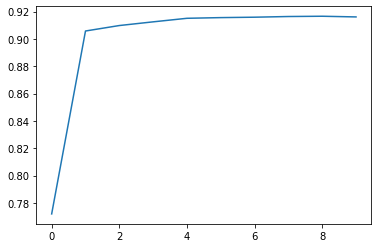

In [3]:
from matplotlib import pyplot as plt

print("Web Training Accuracy Plot")
plt.plot(history['accuracy'])

Web Training Loss Plot


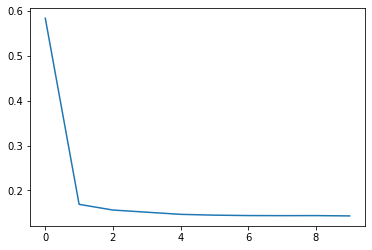

In [4]:
print("Web Training Loss Plot")
plt.plot(history['loss'])

In [0]:
# Android Training
input_path = 'drive/My Drive/Pix2Code/datasets/android/training_features'
output_path = 'drive/My Drive/Pix2Code/AndroidModel'
print("Android Training Started...")
androidhistory = startTraining(input_path, output_path)

print("Android Training Completed and Model Saved...")

Android Training Started...
Loading data...
Generating sparse vectors...
Dataset size: 85946
Vocabulary size: 20
Input shape: (256, 256, 3)
Output size: 20
Parsing data...
Epoch 1/10
1343/1342 [==============================] - 1029s 766ms/step - loss: 1.1941 - accuracy: 0.6079
Epoch 2/10
1343/1342 [==============================] - 1035s 770ms/step - loss: 0.3663 - accuracy: 0.8231
Epoch 3/10
1343/1342 [==============================] - 1032s 769ms/step - loss: 0.3424 - accuracy: 0.8283
Epoch 4/10
1343/1342 [==============================] - 1029s 766ms/step - loss: 0.3349 - accuracy: 0.8303
Epoch 5/10
1343/1342 [==============================] - 1021s 761ms/step - loss: 0.3330 - accuracy: 0.8310
Epoch 6/10
1343/1342 [==============================] - 1027s 765ms/step - loss: 0.3316 - accuracy: 0.8315
Epoch 7/10
1343/1342 [==============================] - 1029s 766ms/step - loss: 0.3299 - accuracy: 0.8314
Epoch 8/10
1343/1342 [==============================] - 1026s 764ms/step - loss

Android Training Accuracy Plot


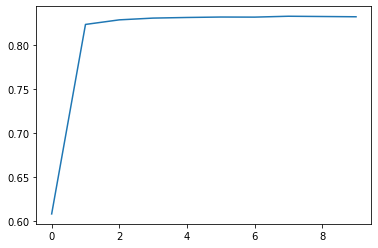

In [5]:
print("Android Training Accuracy Plot")
plt.plot(androidhistory['accuracy'])

Android Training Loss Plot


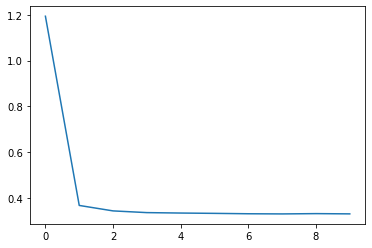

In [6]:
print("Android Training Loss Plot")
plt.plot(androidhistory['loss'])